In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [2]:
df = pd.read_csv("Firm_level_data.csv")

In [3]:
df.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [4]:
df = df.drop(df.columns[0], axis=1)

In [5]:
df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [6]:
df.shape

(759, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


In [8]:
df.describe(include="all")

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
count,759.000000,759.000000,759.000000,759.000000,759.000000,759,738.000000,759.000000,759.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,542,NaN,NaN,NaN
mean,2689.705158,1977.747498,25.831357,439.938074,14.164519,NaN,2.794910,2732.734750,43.020540
std,8722.060124,6466.704896,97.259577,2007.397588,43.321443,NaN,3.366591,7071.072362,21.685586
min,0.138000,0.057000,0.000000,0.000000,0.006000,NaN,0.119001,1.971053,0.000000
25%,122.920000,52.650501,1.000000,4.628262,0.927500,NaN,1.018783,103.593946,25.395000
50%,448.577082,202.179023,3.000000,36.864136,2.924000,NaN,1.680303,410.793529,44.110000
75%,1822.547366,1075.790020,11.500000,143.253403,10.050001,NaN,3.139309,2054.160386,60.510000


In [9]:
df["sp500"].value_counts()

no     542
yes    217
Name: sp500, dtype: int64

In [10]:
df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [11]:
#duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


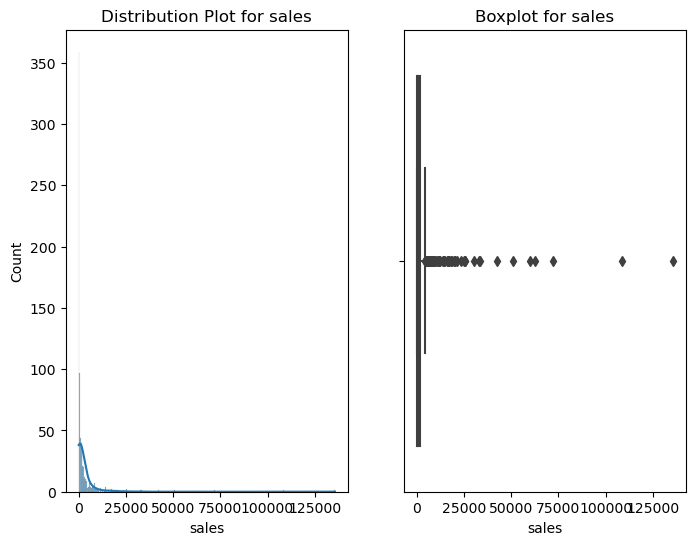

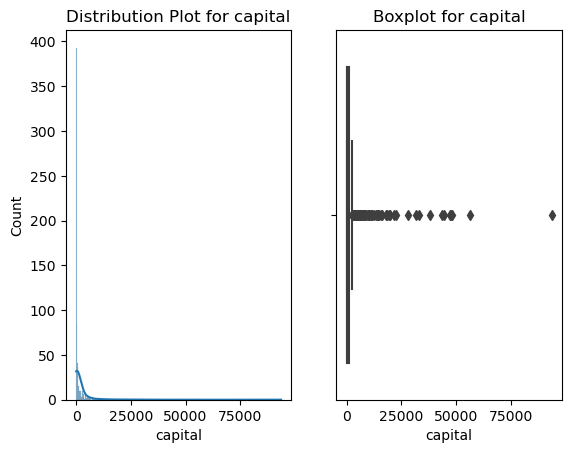

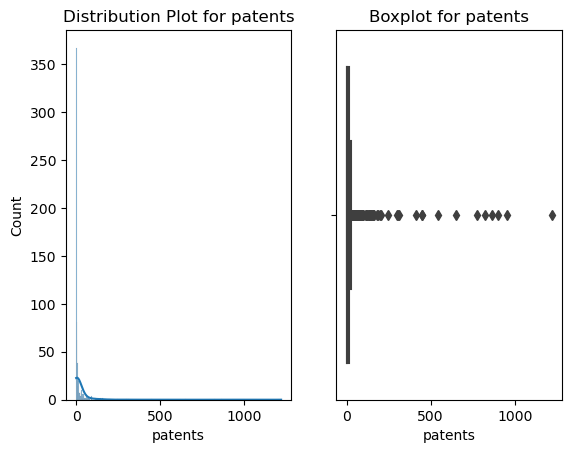

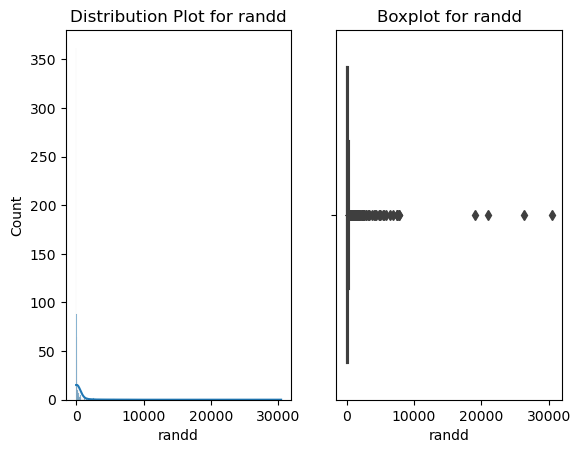

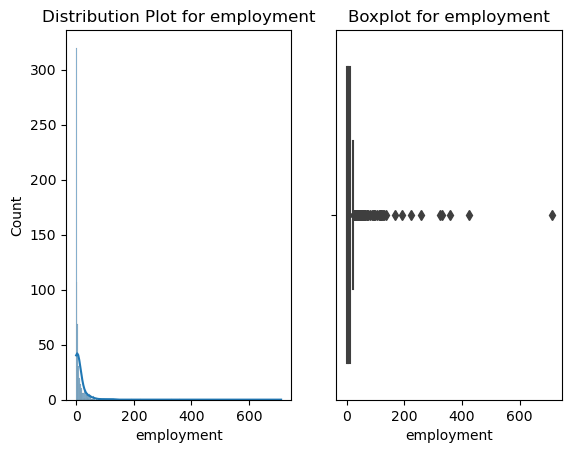

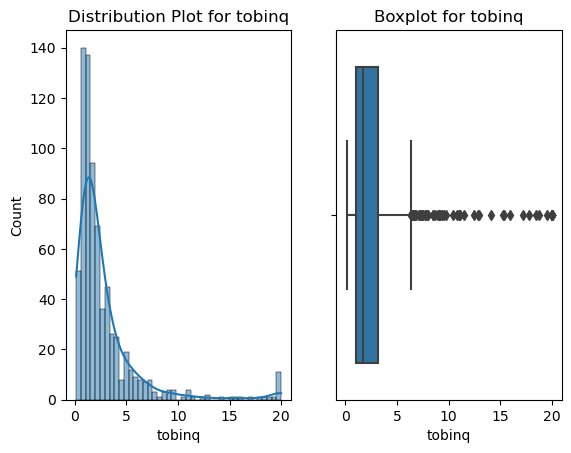

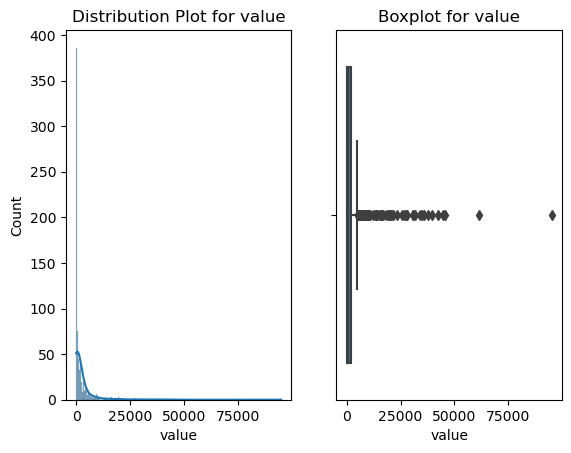

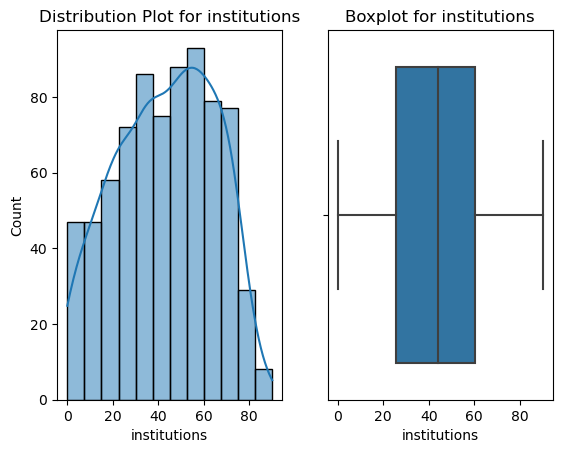

In [12]:
df1= df.drop(columns=["sp500"])
plt.figure(figsize=(8, 6))
for column in df1.columns:
    plt.subplot(1, 2, 1)  
    sns.histplot(df1[column], kde=True)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1, 2, 2)  
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot for {column}')

 
    plt.show()

<Axes: xlabel='patents', ylabel='capital'>

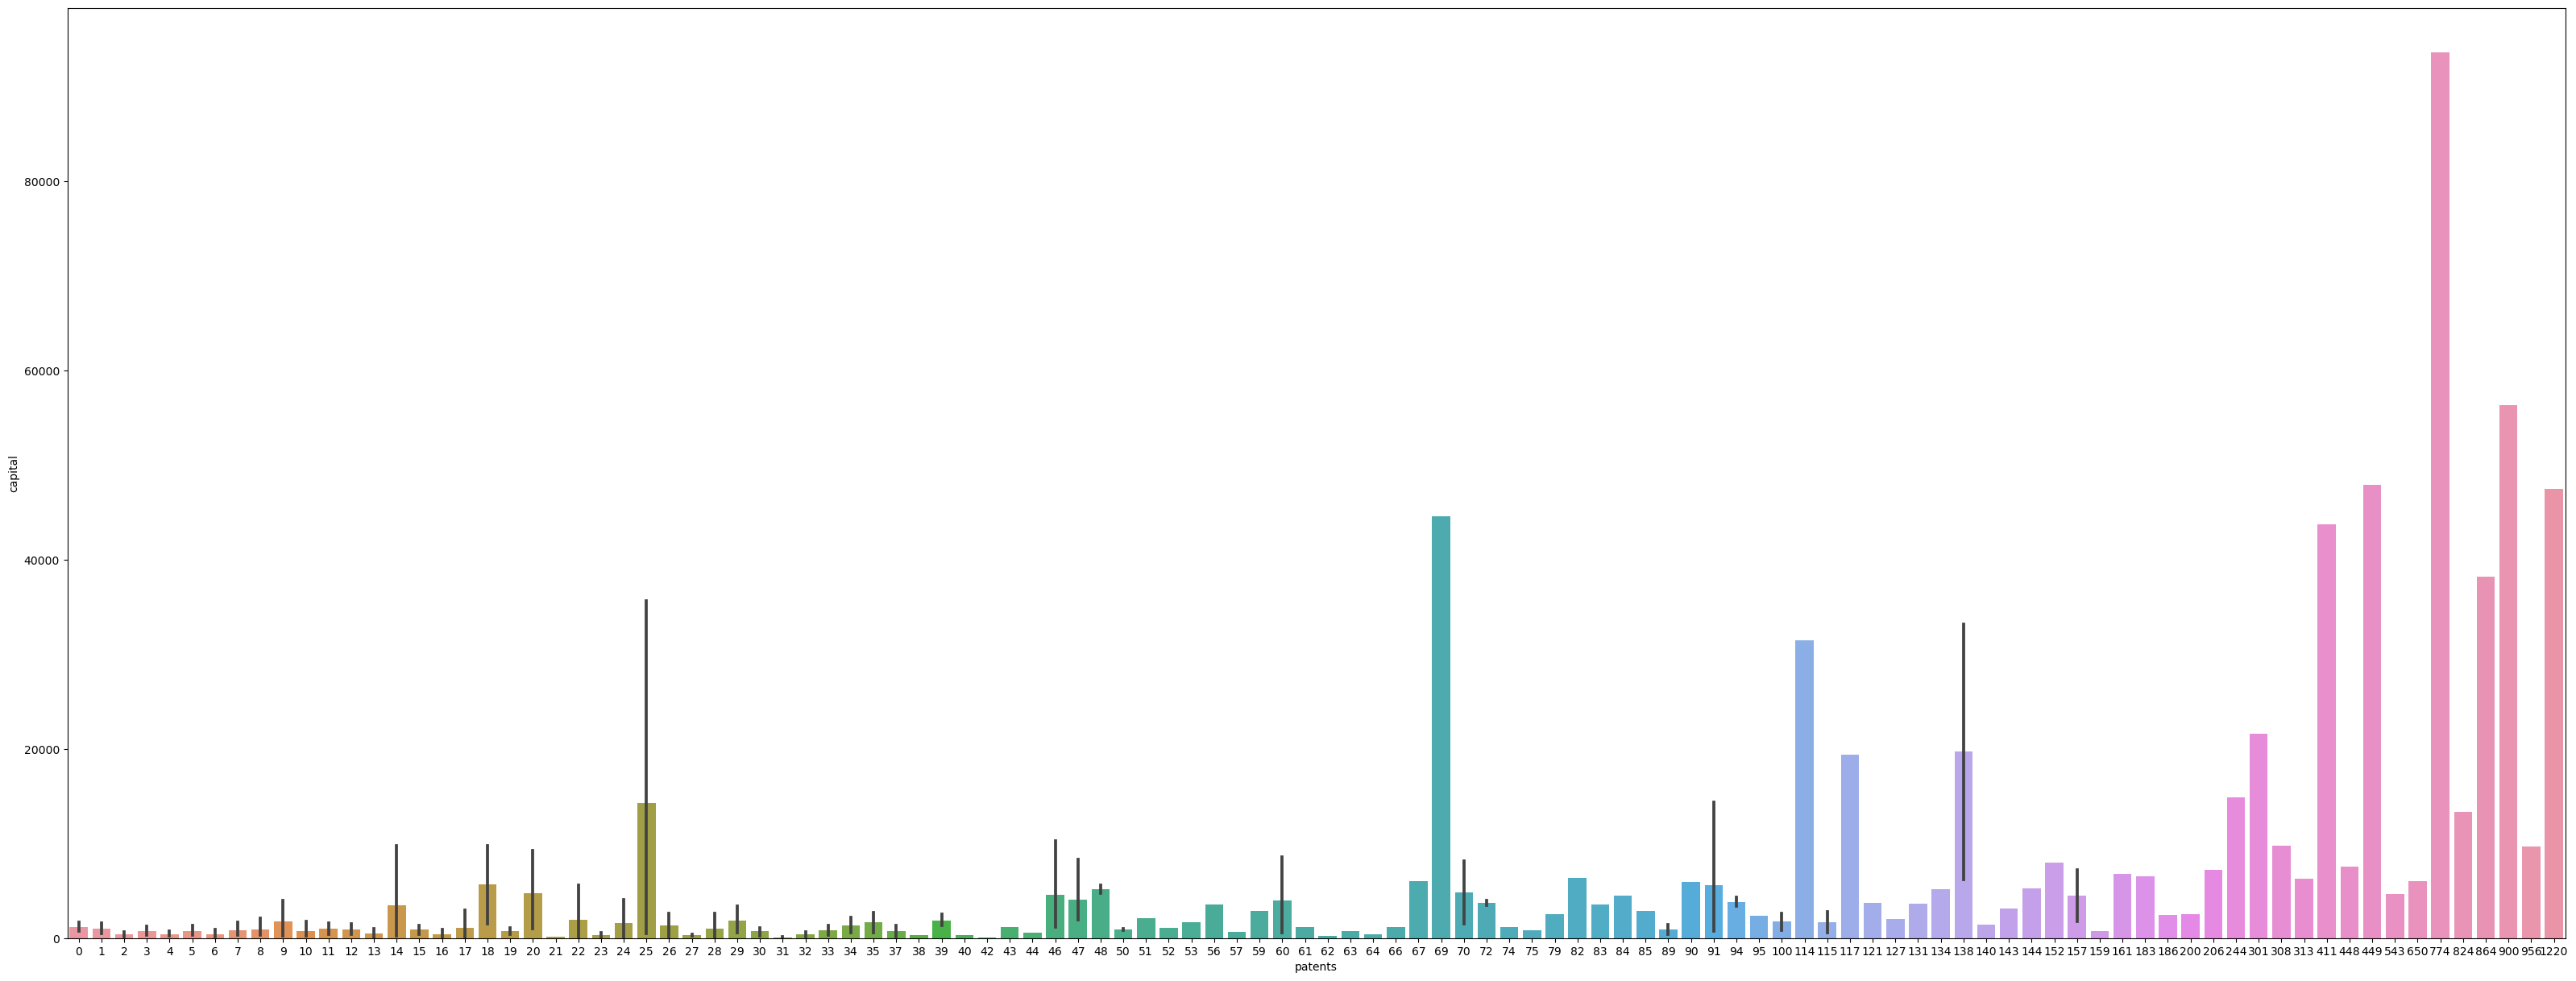

In [13]:
plt.figure(figsize=(40, 15)) 
sns.barplot(x=df['patents'], y=df['capital']) 


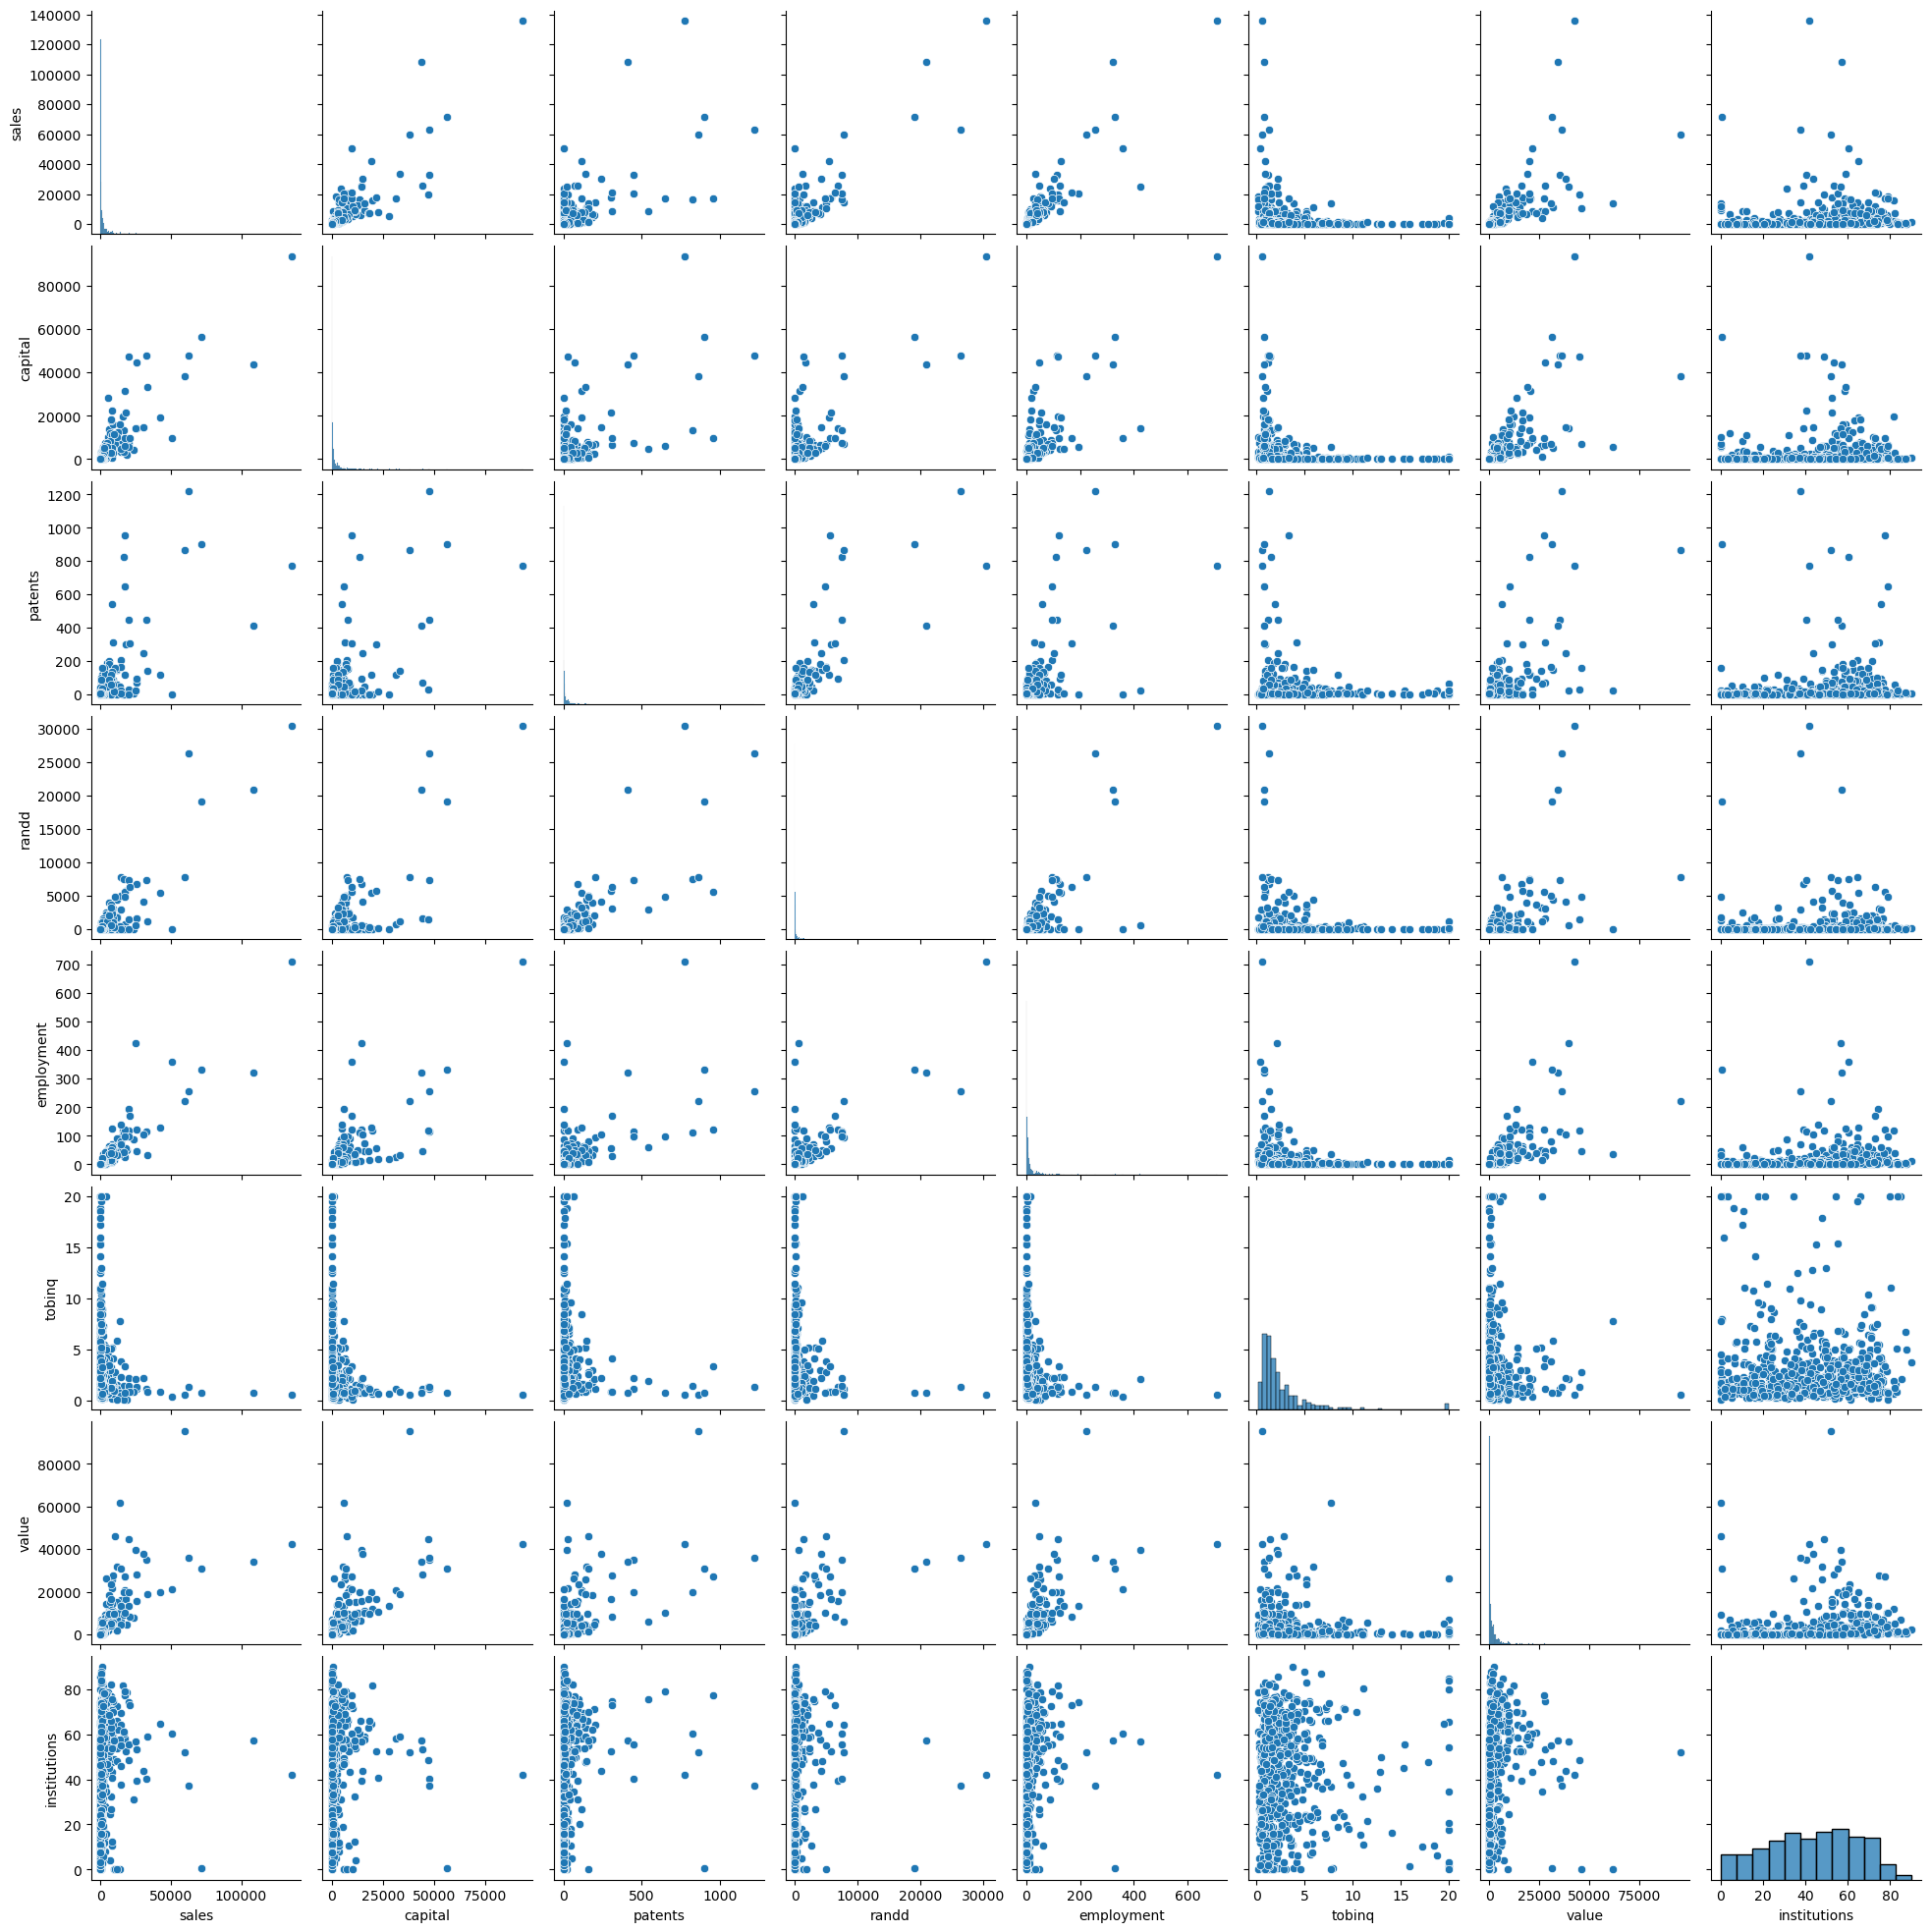

In [14]:
sns.pairplot(df)
plt.show()

C:\Users\Kavin\AppData\Local\Temp\ipykernel_17032\3599590156.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Cor=df.corr(method='pearson')


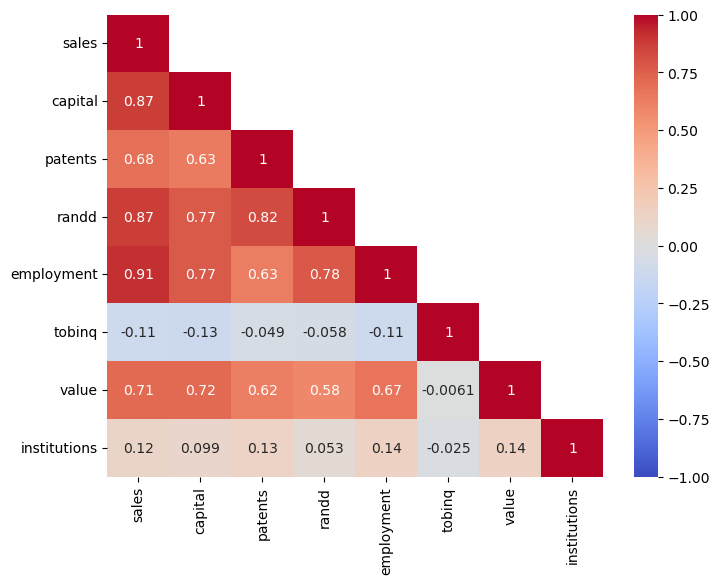

In [15]:
Cor=df.corr(method='pearson')
plt.figure(figsize=(8,6))
mask = np.array (Cor)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask, vmax =1, vmin=-1, cmap ='coolwarm');

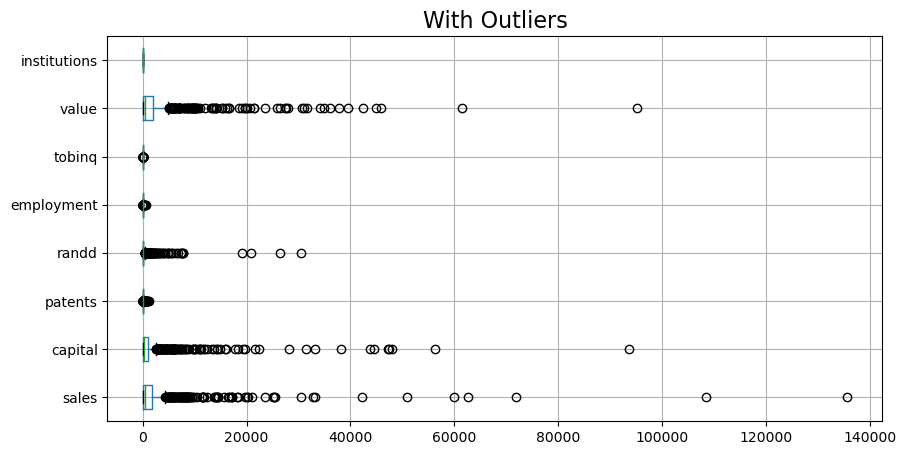

In [16]:
cont=df1.dtypes[(df1.dtypes!='uint8')].index
plt.figure(figsize=(10,5))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

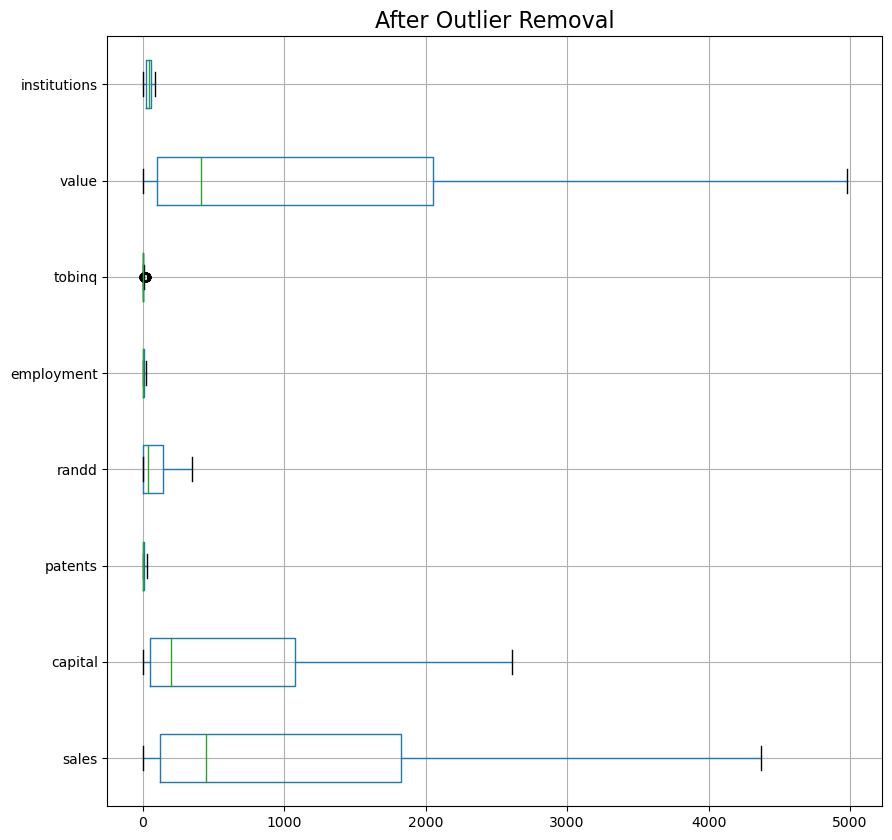

In [19]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [20]:
# 1.2

In [21]:
df.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [22]:
df['tobinq'].skew()

3.2857727840013906

In [23]:
median_value = df['tobinq'].median()

df['tobinq'].fillna(median_value, inplace=True)

In [24]:
df.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

In [25]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

object_columns = df.select_dtypes(include=['object']).columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [26]:
df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,-0.267788,-0.591504,0.221152,1.979986,-0.564800,no,2.493756,0.142598,1.718839
1,-0.542217,-0.632706,-0.583181,-0.782879,-0.619331,no,-0.577847,-0.645807,0.738279
2,2.052715,1.962722,1.955496,1.979986,2.055116,yes,0.734749,2.055843,0.215929
3,-0.513909,-0.481679,-0.683723,-0.125658,-0.471265,no,-0.740066,-0.748521,-0.744789
4,-0.694622,-0.613908,-0.583181,-0.670901,-0.608694,no,-0.511899,-0.746022,0.297142


In [27]:
df=pd.get_dummies(df, columns=["sp500"], drop_first=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    float64
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   tobinq        759 non-null    float64
 6   value         759 non-null    float64
 7   institutions  759 non-null    float64
 8   sp500_yes     759 non-null    uint8  
dtypes: float64(8), uint8(1)
memory usage: 48.3 KB


In [29]:
df.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,-0.267788,-0.591504,0.221152,1.979986,-0.564800,2.493756,0.142598,1.718839,0
1,-0.542217,-0.632706,-0.583181,-0.782879,-0.619331,-0.577847,-0.645807,0.738279,0
2,2.052715,1.962722,1.955496,1.979986,2.055116,0.734749,2.055843,0.215929,1
3,-0.513909,-0.481679,-0.683723,-0.125658,-0.471265,-0.740066,-0.748521,-0.744789,0
4,-0.694622,-0.613908,-0.583181,-0.670901,-0.608694,-0.511899,-0.746022,0.297142,0


In [30]:
X = df.drop('sales', axis=1)

y = df[['sales']]

In [31]:
X.head()

,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,-0.591504,0.221152,1.979986,-0.564800,2.493756,0.142598,1.718839,0
1,-0.632706,-0.583181,-0.782879,-0.619331,-0.577847,-0.645807,0.738279,0
2,1.962722,1.955496,1.979986,2.055116,0.734749,2.055843,0.215929,1
3,-0.481679,-0.683723,-0.125658,-0.471265,-0.740066,-0.748521,-0.744789,0
4,-0.613908,-0.583181,-0.670901,-0.608694,-0.511899,-0.746022,0.297142,0


In [32]:
y.head()

,sales
0,-0.267788
1,-0.542217
2,2.052715
3,-0.513909
4,-0.694622


In [33]:
#1.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [34]:
X_train

,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
626,0.612227,0.723860,-0.206409,1.167240,-0.333052,0.488463,-0.532988,0
333,-0.744145,-0.583181,-0.710087,-0.777545,-0.717031,-0.778833,-0.984276,0
257,-0.198723,1.226569,-0.095381,-0.036482,-0.191825,-0.203035,1.228328,0
173,0.081876,-0.784265,-0.240832,0.083340,0.116599,0.482702,1.230635,1
242,-0.340238,-0.583181,-0.782879,-0.657234,-0.183503,-0.580261,1.956480,0
...,...,...,...,...,...,...,...,...
645,0.143811,1.955496,1.979986,0.388152,-0.358619,0.047982,0.281453,0
715,-0.394628,-0.784265,-0.774561,-0.449379,-0.653200,-0.650421,-1.277752,0
72,-0.732121,-0.784265,-0.755217,-0.651121,-0.598319,-0.753402,-0.616509,0
235,-0.725665,-0.583181,-0.373339,-0.773388,-0.246545,-0.743580,-0.326724,0


In [35]:
regression_model = LinearRegression()
regression_model = regression_model.fit(X_train, y_train)

In [36]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for capital is 0.26890715923801206
The coefficient for patents is -0.030646679910095287
The coefficient for randd is 0.049410945607722884
The coefficient for employment is 0.4263910399194685
The coefficient for tobinq is -0.0358420219540224
The coefficient for value is 0.26562831595491115
The coefficient for institutions is 0.001267472239244588
The coefficient for sp500_yes is 0.11109051087732594


In [37]:

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.02911400504075629


In [38]:
regression_model.coef_

array([[ 0.26890716, -0.03064668,  0.04941095,  0.42639104, -0.03584202,
         0.26562832,  0.00126747,  0.11109051]])

In [39]:
# Rounding of to 3 decimals
round (pd.DataFrame(regression_model.coef_.reshape(1,-1),columns=X_train.columns),3).T

,0
capital,0.269
patents,-0.031
randd,0.049
employment,0.426
tobinq,-0.036
value,0.266
institutions,0.001
sp500_yes,0.111


In [40]:
model_coeff = pd.DataFrame()
model_coeff["Columns"]= X_train.columns
model_coeff['Coefficient Estimate'] = round (pd.Series(regression_model.coef_[0]),3)
print(model_coeff)

        Columns  Coefficient Estimate
0       capital                 0.269
1       patents                -0.031
2         randd                 0.049
3    employment                 0.426
4        tobinq                -0.036
5         value                 0.266
6  institutions                 0.001
7     sp500_yes                 0.111


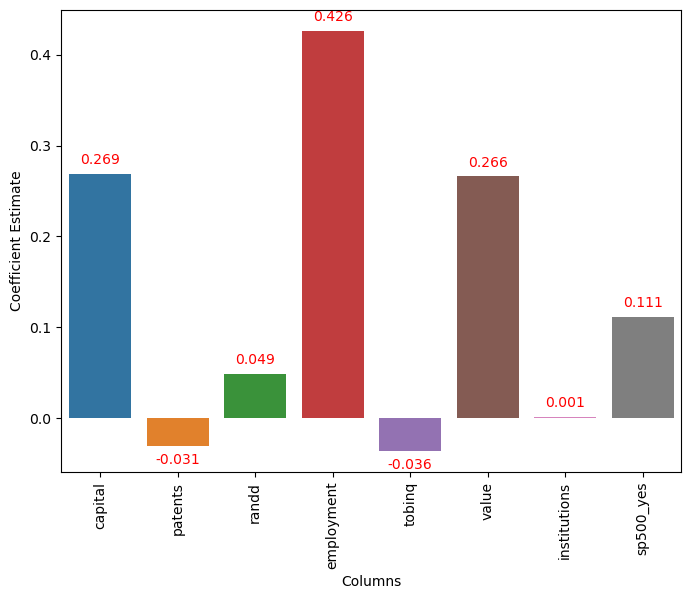

In [41]:
plt.subplots(figsize = (8, 6))
ax=sns.barplot(x = 'Columns', y = 'Coefficient Estimate', data = model_coeff)
ax.bar_label(ax.containers[0], label_type='edge', color = 'red', rotation =0, fontsize = 10, padding =5) #matplotlib version is above 3.4
plt.xticks(rotation=90);
plt.show()

In [42]:
# R square on training data
regression_model.score(X_train, y_train)

0.9354491655587379

In [43]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9231161010858825

In [44]:
#Train Predictions
predicted_train=regression_model.predict(X_train)
predicted_train

array([[ 0.74184765],
       [-0.76039929],
       [-0.18591035],
       [ 0.27726411],
       [-0.56673229],
       [-0.32732918],
       [ 0.20011482],
       [ 0.39836867],
       [-1.04871297],
       [ 1.3298195 ],
       [-0.57863138],
       [-0.39553536],
       [-0.68547955],
       [ 2.05898793],
       [-0.62100425],
       [ 0.78044251],
       [ 0.34222764],
       [ 0.63088177],
       [-0.81483712],
       [-0.58736262],
       [-0.48819049],
       [-0.59590904],
       [-0.7889781 ],
       [-0.80135633],
       [-0.52527949],
       [-0.77108076],
       [ 0.94960934],
       [-0.64985902],
       [-0.83629881],
       [ 0.74227323],
       [-0.72231679],
       [-0.79015168],
       [ 1.51853071],
       [-0.42196282],
       [ 2.03317882],
       [-0.79526053],
       [ 0.25737866],
       [ 2.07695059],
       [-0.0772725 ],
       [-0.64370056],
       [ 2.00713196],
       [-0.75133244],
       [-0.80236718],
       [-0.63833898],
       [-0.61197837],
       [-0

In [45]:
#Test Predictions
predicted_test=regression_model.predict(X_test)
predicted_test

array([[-0.70458011],
       [-0.56752959],
       [ 0.8993036 ],
       [-0.71053526],
       [-0.44603787],
       [-0.73489344],
       [-0.72346463],
       [-0.98681586],
       [ 0.75549169],
       [-0.76009445],
       [-0.71375834],
       [-0.65098468],
       [-0.73721425],
       [-0.0878713 ],
       [-0.74294214],
       [-0.28079395],
       [-0.66509244],
       [-0.38116046],
       [-0.79200492],
       [ 1.01654789],
       [-0.46419846],
       [-0.78560327],
       [ 2.12819503],
       [ 0.04632993],
       [ 2.08413815],
       [ 0.01746337],
       [ 0.4202205 ],
       [-0.70999418],
       [ 2.09196463],
       [ 1.47240017],
       [ 2.08721269],
       [ 1.64664066],
       [-0.81592564],
       [-0.25500725],
       [ 2.11505942],
       [-0.49438688],
       [-0.66354409],
       [-0.67820756],
       [-0.52682479],
       [-0.77516248],
       [-0.65435158],
       [-0.37749789],
       [-0.66623397],
       [-0.60627661],
       [ 0.88654231],
       [ 1

In [46]:
#RMSE on Training data
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.25917580441413207

In [47]:
#RMSE on Testing data
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.26340793619753367

In [48]:
import statsmodels.api as sm

In [49]:
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

In [50]:
X_train

,const,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
626,1.0,0.612227,0.723860,-0.206409,1.167240,-0.333052,0.488463,-0.532988,0
333,1.0,-0.744145,-0.583181,-0.710087,-0.777545,-0.717031,-0.778833,-0.984276,0
257,1.0,-0.198723,1.226569,-0.095381,-0.036482,-0.191825,-0.203035,1.228328,0
173,1.0,0.081876,-0.784265,-0.240832,0.083340,0.116599,0.482702,1.230635,1
242,1.0,-0.340238,-0.583181,-0.782879,-0.657234,-0.183503,-0.580261,1.956480,0
...,...,...,...,...,...,...,...,...,...
645,1.0,0.143811,1.955496,1.979986,0.388152,-0.358619,0.047982,0.281453,0
715,1.0,-0.394628,-0.784265,-0.774561,-0.449379,-0.653200,-0.650421,-1.277752,0
72,1.0,-0.732121,-0.784265,-0.755217,-0.651121,-0.598319,-0.753402,-0.616509,0
235,1.0,-0.725665,-0.583181,-0.373339,-0.773388,-0.246545,-0.743580,-0.326724,0


In [51]:
olsmod_1 = sm.OLS(y_train,X_train).fit()
print(olsmod_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     945.6
Date:                Sat, 30 Dec 2023   Prob (F-statistic):          6.02e-305
Time:                        20:27:36   Log-Likelihood:                -36.474
No. Observations:                 531   AIC:                             90.95
Df Residuals:                     522   BIC:                             129.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0291      0.017     -1.733   

In [52]:
olsmod_2 = sm.OLS(y_test,X_test).fit()
print(olsmod_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     373.1
Date:                Sat, 30 Dec 2023   Prob (F-statistic):          4.75e-123
Time:                        20:27:36   Log-Likelihood:                -5.9422
No. Observations:                 228   AIC:                             29.88
Df Residuals:                     219   BIC:                             60.75
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0308      0.024      1.288   

In [53]:
predicted_test.shape

(228, 1)

In [54]:
y_test.shape

(228, 1)

In [55]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsmod_1.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsmod_1.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,0.465498,0.741848,-0.276349
1,-0.769637,-0.760399,-0.009238
2,-0.111504,-0.185910,0.074407
3,-0.027782,0.277264,-0.305046
4,-0.701687,-0.566732,-0.134954


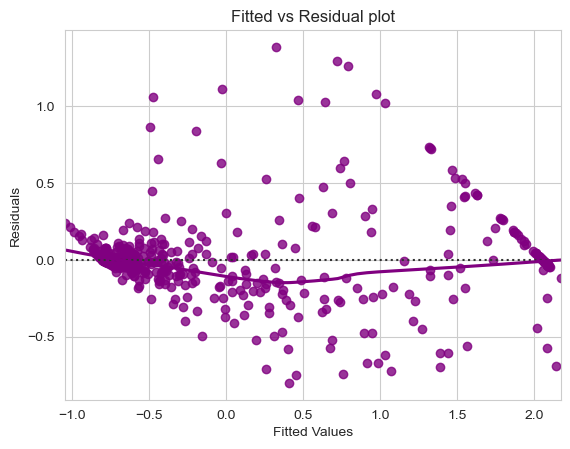

In [56]:
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()


In [57]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_test.values.flatten()  # actual values
df_pred["Fitted Values"] = olsmod_2.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsmod_2.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,-0.751485,-0.697459,-0.054026
1,-0.606816,-0.560103,-0.046712
2,0.678812,0.864440,-0.185627
3,-0.728405,-0.711163,-0.017242
4,-0.592357,-0.456111,-0.136246


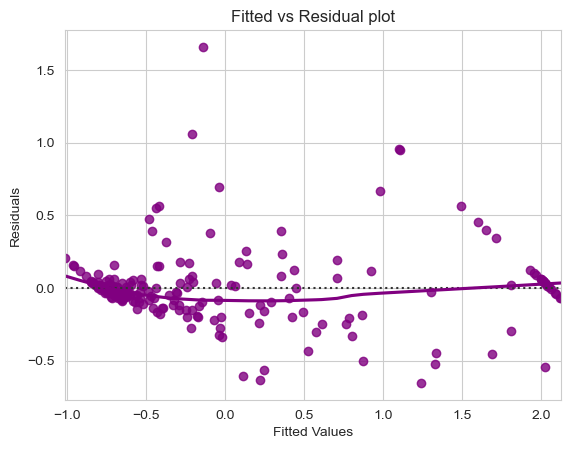

In [58]:
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

# Problem-2

In [59]:
df2 = pd.read_csv("Car_Crash.csv")

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11217 non-null  int64  
 1   dvcat        11217 non-null  object 
 2   weight       11217 non-null  float64
 3   Survived     11217 non-null  object 
 4   airbag       11217 non-null  object 
 5   seatbelt     11217 non-null  object 
 6   frontal      11217 non-null  int64  
 7   sex          11217 non-null  object 
 8   ageOFocc     11217 non-null  int64  
 9   yearacc      11217 non-null  int64  
 10  yearVeh      11217 non-null  float64
 11  abcat        11217 non-null  object 
 12  occRole      11217 non-null  object 
 13  deploy       11217 non-null  int64  
 14  injSeverity  11140 non-null  float64
 15  caseid       11217 non-null  object 
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


In [61]:
df2.shape

(11217, 16)

In [62]:
df2.describe(include="all")

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
count,11217.000000,11217,11217.000000,11217,11217,11217,11217.000000,11217,11217.000000,11217.000000,11217.000000,11217,11217,11217.000000,11140.000000,11217
unique,NaN,5,NaN,2,2,2,NaN,2,NaN,NaN,NaN,3,2,NaN,NaN,6488
top,NaN,10-24,NaN,survived,airbag,belted,NaN,m,NaN,NaN,NaN,deploy,driver,NaN,NaN,73:100:2
freq,NaN,5414,NaN,10037,7064,7849,NaN,6048,NaN,NaN,NaN,4365,8786,NaN,NaN,7
mean,5608.000000,NaN,431.405309,NaN,NaN,NaN,0.644022,NaN,37.427654,2001.103236,1994.177944,NaN,NaN,0.389141,1.825583,NaN
std,3238.213319,NaN,1406.202941,NaN,NaN,NaN,0.478830,NaN,18.192429,1.056805,5.658704,NaN,NaN,0.487577,1.378535,NaN
min,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,16.000000,1997.000000,1953.000000,NaN,NaN,0.000000,0.000000,NaN
25%,2804.000000,NaN,28.292000,NaN,NaN,NaN,0.000000,NaN,22.000000,2001.000000,1991.000000,NaN,NaN,0.000000,1.000000,NaN
50%,5608.000000,NaN,82.195000,NaN,NaN,NaN,1.000000,NaN,33.000000,2001.000000,1995.000000,NaN,NaN,0.000000,2.000000,NaN
75%,8412.000000,NaN,324.056000,NaN,NaN,NaN,1.000000,NaN,48.000000,2002.000000,1999.000000,NaN,NaN,1.000000,3.000000,NaN


In [63]:
df2. head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [64]:
df2.isnull().sum()

Unnamed: 0      0
dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [65]:
for column in df2.columns:
    if df2[column].dtype == 'object':
        print(column.upper(),': ',df2[column].nunique())
        print(df2[column].value_counts().sort_values())
        print('\n')

DVCAT :  5
1-9km/h     282
55+         809
40-54      1344
25-39      3368
10-24      5414
Name: dvcat, dtype: int64


SURVIVED :  2
Not_Survived     1180
survived        10037
Name: Survived, dtype: int64


AIRBAG :  2
none      4153
airbag    7064
Name: airbag, dtype: int64


SEATBELT :  2
none      3368
belted    7849
Name: seatbelt, dtype: int64


SEX :  2
f    5169
m    6048
Name: sex, dtype: int64


ABCAT :  3
nodeploy    2699
unavail     4153
deploy      4365
Name: abcat, dtype: int64


OCCROLE :  2
pass      2431
driver    8786
Name: occRole, dtype: int64


CASEID :  6488
2:95:1      1
45:49:1     1
45:88:1     1
45:42:2     1
45:34:1     1
           ..
74:58:1     6
49:106:1    6
75:84:2     6
74:74:2     6
73:100:2    7
Name: caseid, Length: 6488, dtype: int64




In [66]:
dups2 = df2.duplicated()
print('Number of duplicate rows = %d' % (dups2.sum()))


Number of duplicate rows = 0


In [67]:
median_value = df2['injSeverity'].median()
df2['injSeverity'].fillna(median_value, inplace=True)

In [68]:
df.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
tobinq          0
value           0
institutions    0
sp500_yes       0
dtype: int64

In [69]:
df2.injSeverity.nunique()

6

In [70]:
df2.select_dtypes(include='object').head()

,dvcat,Survived,airbag,seatbelt,sex,abcat,occRole,caseid
0,55+,Not_Survived,none,none,m,unavail,driver,2:13:2
1,25-39,Not_Survived,airbag,belted,f,nodeploy,driver,2:17:1
2,55+,Not_Survived,none,belted,m,unavail,driver,2:79:1
3,55+,Not_Survived,none,belted,f,unavail,pass,2:79:1
4,55+,Not_Survived,none,none,m,unavail,driver,4:58:1


In [71]:
df2=df2.drop(["Unnamed: 0","caseid"], axis=1)

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


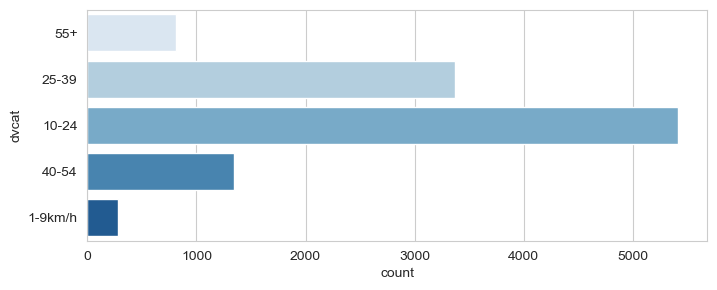

In [73]:
#Univariate Analysis
plt.figure(figsize=(8,3))
sns.countplot(y=(df2.dvcat),palette='Blues');

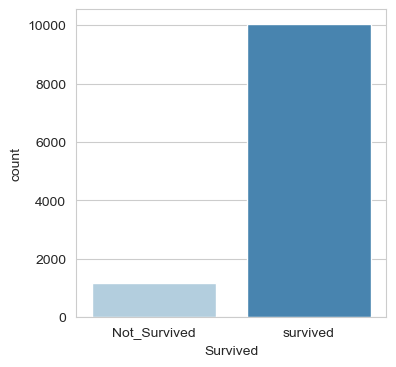

In [74]:
plt.figure(figsize=(4,4))
sns.countplot(x=(df2.Survived),palette='Blues');

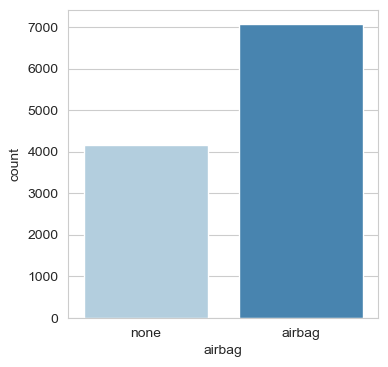

In [75]:
plt.figure(figsize=(4,4))
sns.countplot(x=(df2.airbag),palette='Blues');

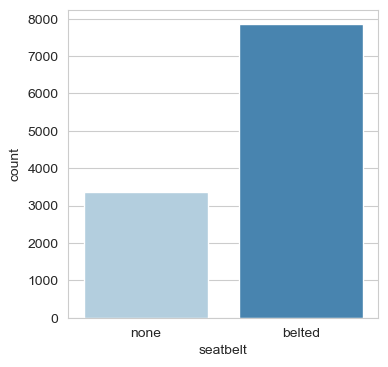

In [76]:
plt.figure(figsize=(4,4))
sns.countplot(x=(df2.seatbelt),palette='Blues');

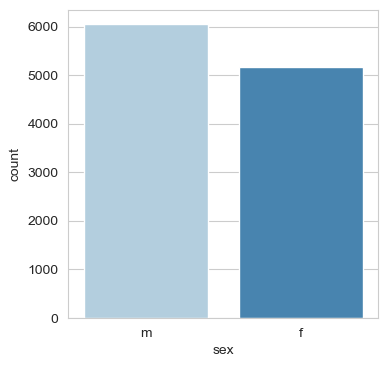

In [77]:
plt.figure(figsize=(4,4))
sns.countplot(x=(df2.sex),palette='Blues');

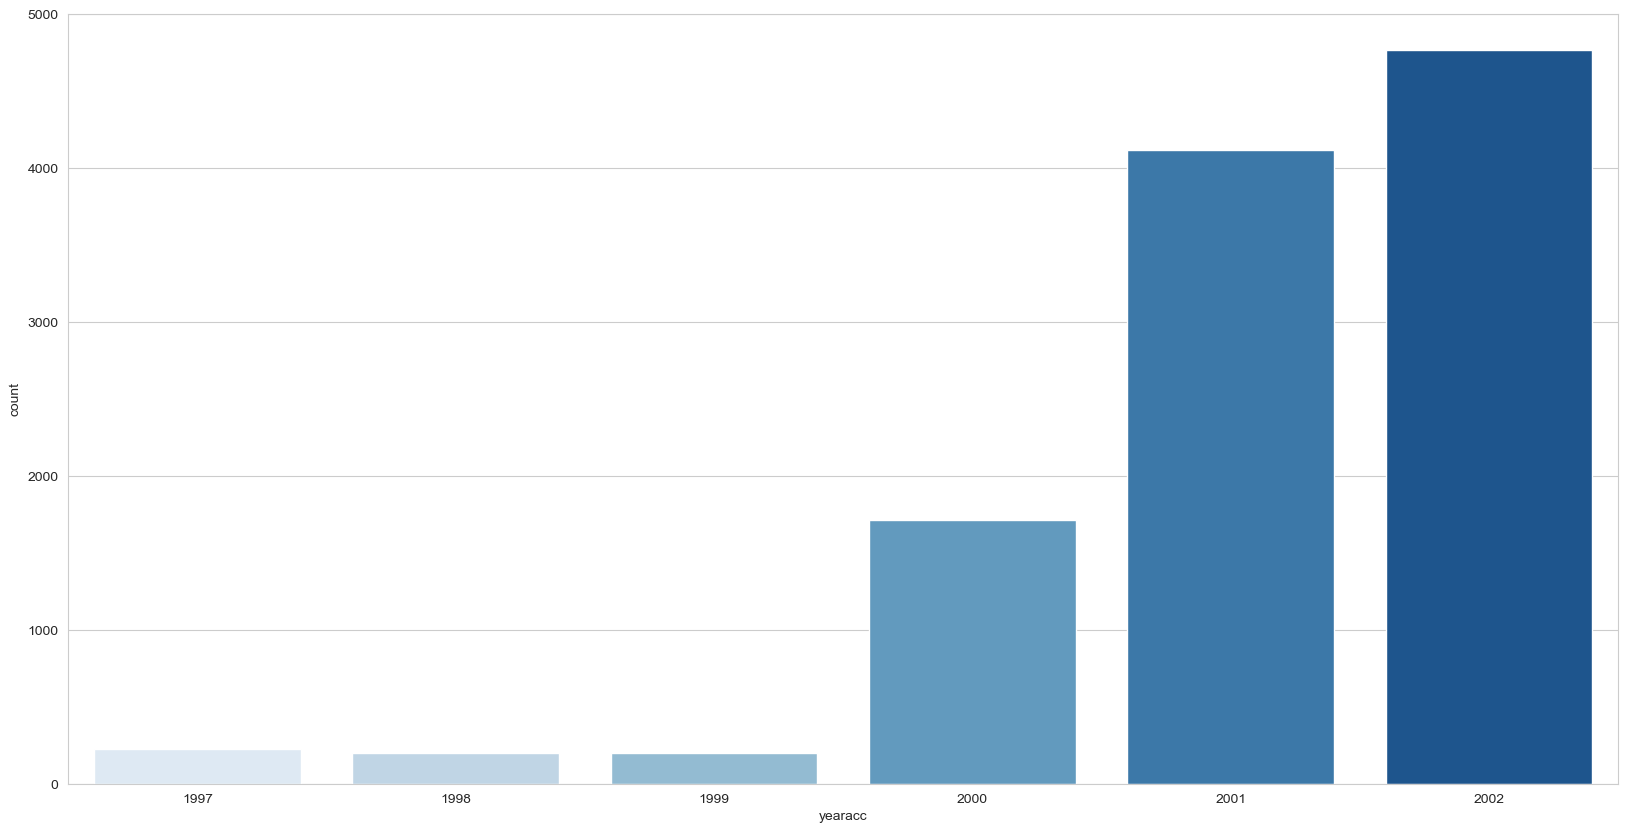

In [78]:
plt.figure(figsize=(20, 10)) 
sns.countplot(x=(df2.yearacc),palette='Blues');

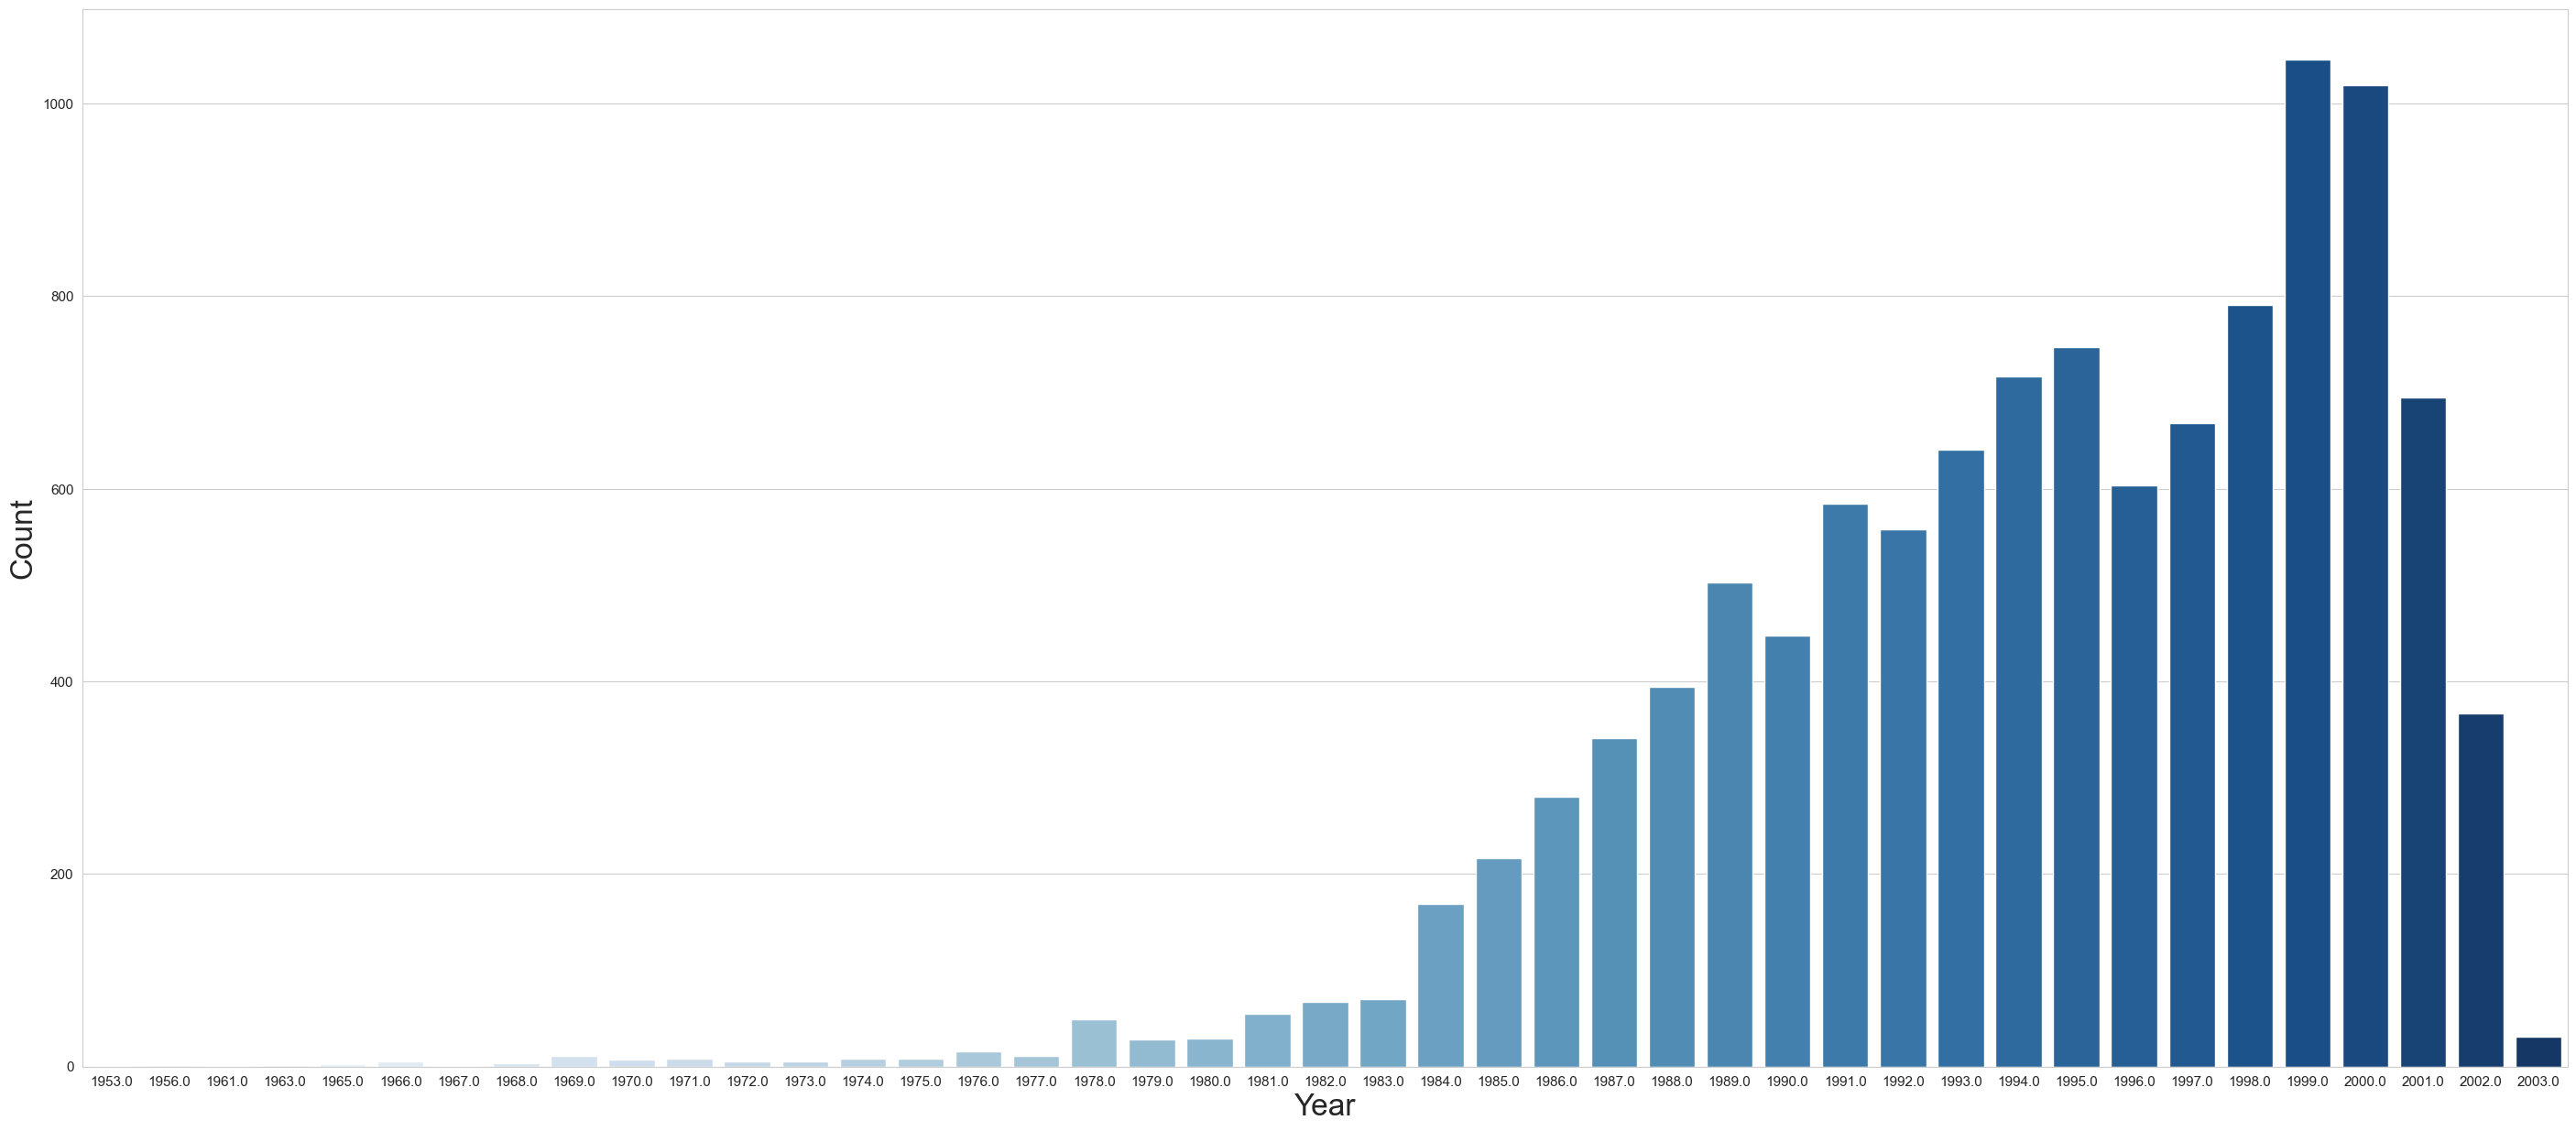

In [79]:
plt.figure(figsize=(35,15)) 
axs=sns.countplot(x=(df2.yearVeh),palette='Blues');
axs.set_xlabel("Year", fontsize=24)  
axs.set_ylabel("Count", fontsize=24)
axs.tick_params(axis='x', labelsize=11)  
axs.tick_params(axis='y', labelsize=11)

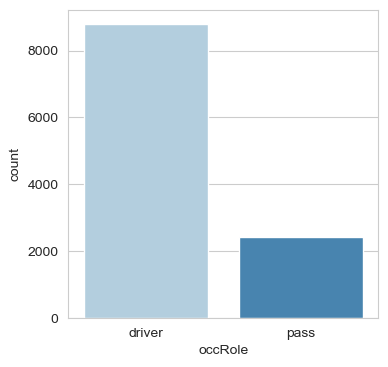

In [80]:
plt.figure(figsize=(4, 4)) 
sns.countplot(x=(df2.occRole),palette='Blues');

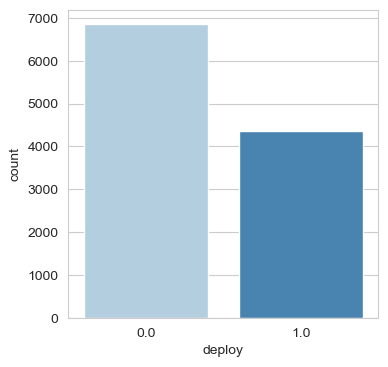

In [130]:
plt.figure(figsize=(4, 4)) 
sns.countplot(x=(df2.deploy),palette='Blues');

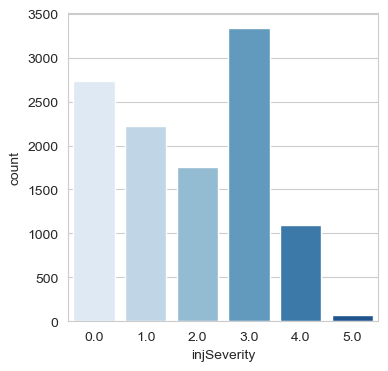

In [81]:
plt.figure(figsize=(4, 4)) 
sns.countplot(x=(df2.injSeverity),palette='Blues');

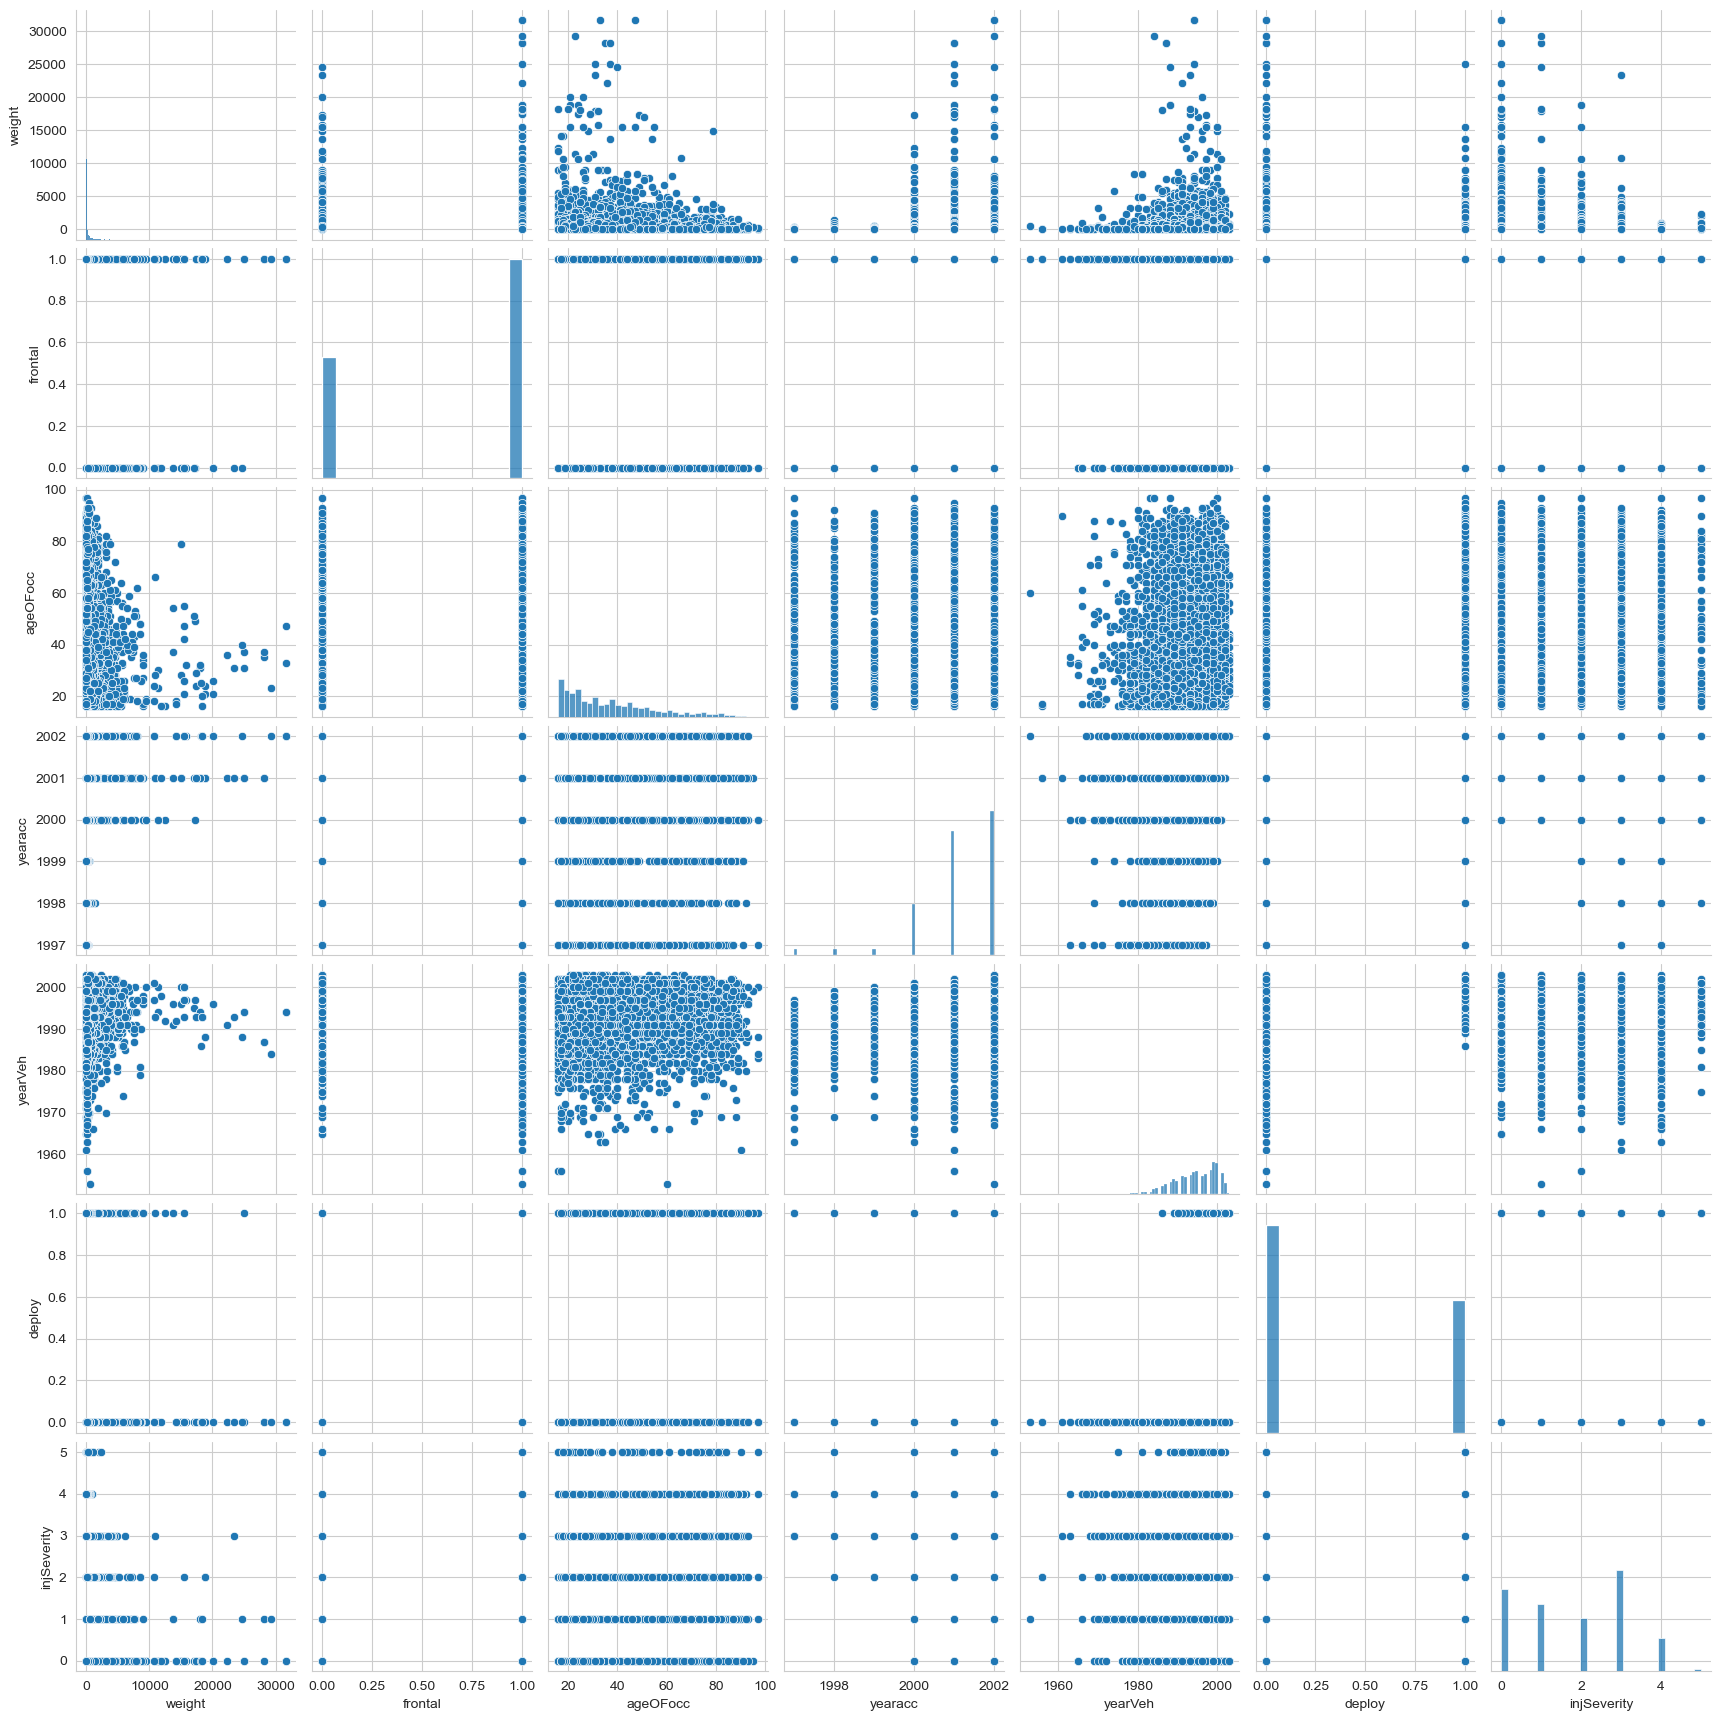

In [82]:
sns.pairplot(df2)
plt.show()

C:\Users\Kavin\AppData\Local\Temp\ipykernel_17032\3424388991.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Cor=df2.corr(method='pearson')


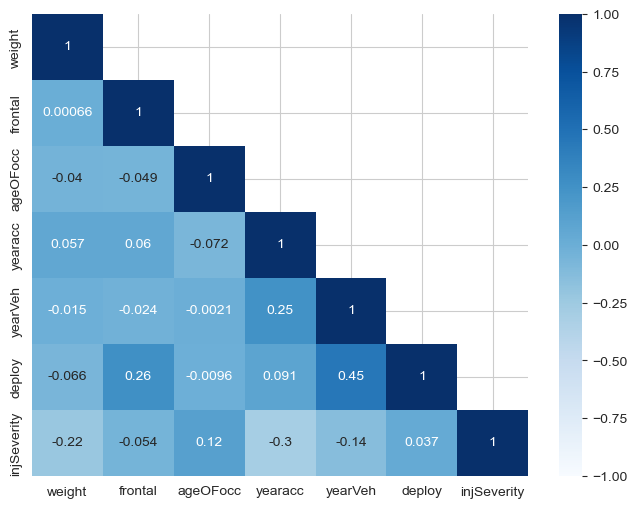

In [83]:
Cor=df2.corr(method='pearson')
plt.figure(figsize=(8,6))
mask = np.array (Cor)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask, vmax =1, vmin=-1, cmap ='Blues');

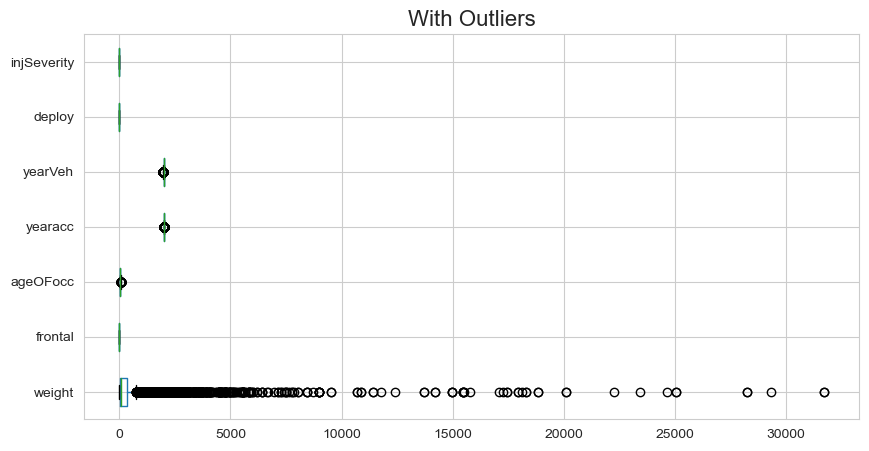

In [84]:
cont=df2.dtypes[(df2.dtypes!='object')].index
plt.figure(figsize=(10,5))
df2[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [85]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [86]:
for column in df2[cont].columns:
    lr,ur=remove_outlier(df2[column])
    df2[column]=np.where(df2[column]>ur,ur,df2[column])
    df2[column]=np.where(df2[column]<lr,lr,df2[column])

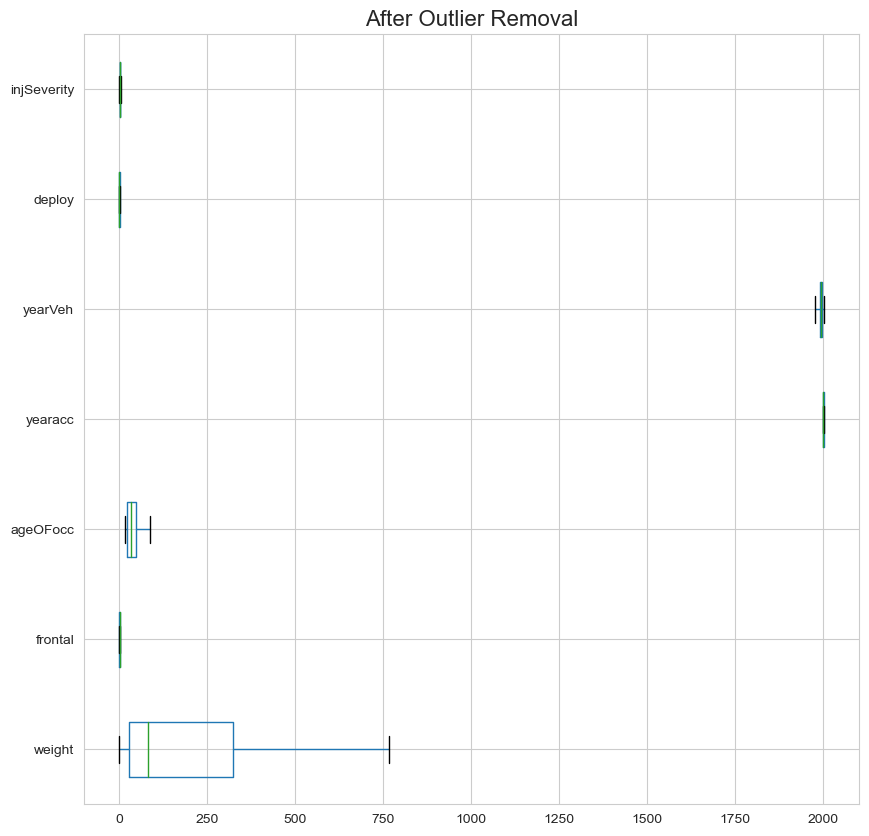

In [87]:
plt.figure(figsize=(10,10))
df2[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [88]:
for column in df2.columns:
    if df2[column].dtype == 'object':
        print(column.upper(),': ',df2[column].nunique())
        print(df2[column].value_counts().sort_values())
        print('\n')

DVCAT :  5
1-9km/h     282
55+         809
40-54      1344
25-39      3368
10-24      5414
Name: dvcat, dtype: int64


SURVIVED :  2
Not_Survived     1180
survived        10037
Name: Survived, dtype: int64


AIRBAG :  2
none      4153
airbag    7064
Name: airbag, dtype: int64


SEATBELT :  2
none      3368
belted    7849
Name: seatbelt, dtype: int64


SEX :  2
f    5169
m    6048
Name: sex, dtype: int64


ABCAT :  3
nodeploy    2699
unavail     4153
deploy      4365
Name: abcat, dtype: int64


OCCROLE :  2
pass      2431
driver    8786
Name: occRole, dtype: int64




In [89]:
df2['dvcat']=np.where(df2['dvcat'] =='1-9km/h', 0, df2['dvcat'])
df2['dvcat']=np.where(df2['dvcat'] =='55+', 1, df2['dvcat'])
df2['dvcat']=np.where(df2['dvcat'] =='40-54', 2, df2['dvcat'])
df2['dvcat']=np.where(df2['dvcat'] =='25-39', 3, df2['dvcat'])
df2['dvcat']=np.where(df2['dvcat'] =='10-24', 4, df2['dvcat'])

In [90]:
df2['airbag']=np.where(df2['airbag'] =='none', 0, df2['airbag'])
df2['airbag']=np.where(df2['airbag'] =='airbag', 1, df2['airbag'])

In [91]:
df2['seatbelt']=np.where(df2['seatbelt'] =='none', 0, df2['seatbelt'])
df2['seatbelt']=np.where(df2['seatbelt'] =='belted', 1, df2['seatbelt'])

In [92]:
df2['sex']=np.where(df2['sex'] =='m', 0, df2['sex'])
df2['sex']=np.where(df2['sex'] =='f', 1, df2['sex'])

In [93]:
df2['abcat']=np.where(df2['abcat'] =='unavail', 0, df2['abcat'])
df2['abcat']=np.where(df2['abcat'] =='nodeploy', 1, df2['abcat'])
df2['abcat']=np.where(df2['abcat'] =='deploy', 2, df2['abcat'])

In [94]:
df2['occRole']=np.where(df2['occRole'] =='driver', 0, df2['occRole'])
df2['occRole']=np.where(df2['occRole'] =='pass', 1, df2['occRole'])

In [95]:
df2.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,1,27.078,Not_Survived,0,0,1.0,0,32.0,1999.5,1987.0,0,0,0.0,4.0
1,3,89.627,Not_Survived,1,1,0.0,1,54.0,1999.5,1994.0,1,0,0.0,4.0
2,1,27.078,Not_Survived,0,1,1.0,0,67.0,1999.5,1992.0,0,0,0.0,4.0
3,1,27.078,Not_Survived,0,1,1.0,1,64.0,1999.5,1992.0,0,1,0.0,4.0
4,1,13.374,Not_Survived,0,0,1.0,0,23.0,1999.5,1986.0,0,0,0.0,4.0


In [96]:
columns_to_drop = ['yearacc', 'yearVeh']
df2 = df2.drop(columns=columns_to_drop)

In [97]:
df2['Survived'] = df2['Survived'].replace({'Not_Survived':0,'survived':1})
df2['Survived'].value_counts()

1    10037
0     1180
Name: Survived, dtype: int64

In [98]:
df2.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,abcat,occRole,deploy,injSeverity
0,1,27.078,0,0,0,1.0,0,32.0,0,0,0.0,4.0
1,3,89.627,0,1,1,0.0,1,54.0,1,0,0.0,4.0
2,1,27.078,0,0,1,1.0,0,67.0,0,0,0.0,4.0
3,1,27.078,0,0,1,1.0,1,64.0,0,1,0.0,4.0
4,1,13.374,0,0,0,1.0,0,23.0,0,0,0.0,4.0


In [99]:
X1 = df2.drop('Survived', axis=1)
 
y1 = df2['Survived']

X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   airbag       11217 non-null  object 
 3   seatbelt     11217 non-null  object 
 4   frontal      11217 non-null  float64
 5   sex          11217 non-null  object 
 6   ageOFocc     11217 non-null  float64
 7   abcat        11217 non-null  object 
 8   occRole      11217 non-null  object 
 9   deploy       11217 non-null  float64
 10  injSeverity  11217 non-null  float64
dtypes: float64(5), object(6)
memory usage: 964.1+ KB


In [100]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.30 , random_state=1, stratify=y1)

In [101]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X1_train, y1_train)

C:\Users\Kavin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.4s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [102]:
y1train_predict = model.predict(X1_train)
y1test_predict = model.predict(X1_test)

In [103]:
y1test_predict_prob=model.predict_proba(X1_test)
pd.DataFrame(y1test_predict_prob).head()

,0,1
0,0.049110,0.950890
1,0.001047,0.998953
2,0.016325,0.983675
3,0.003173,0.996827
4,0.021022,0.978978


In [104]:
# Accuracy - Training Data
model.score(X1_train, y1_train)

0.9811488982295249

AUC: 0.987


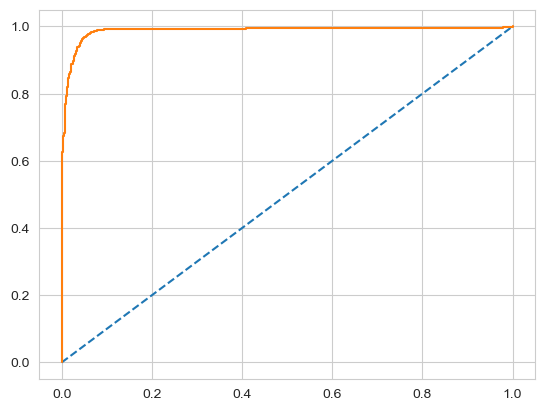

In [105]:
probs = model.predict_proba(X1_train)
probs = probs[:, 1]

auc = roc_auc_score(y1_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

In [106]:
# Accuracy - Test Data
model.score(X1_test, y1_test)

0.9818775995246584

AUC: 0.987


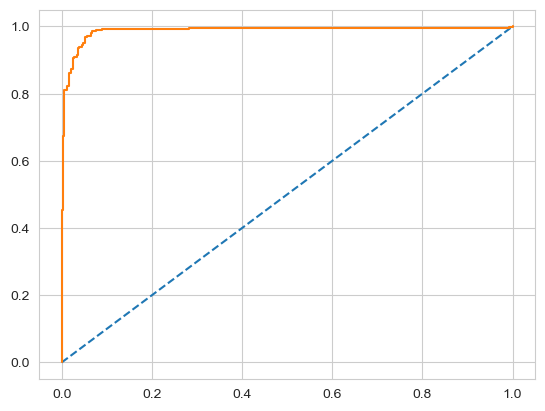

In [107]:
probs = model.predict_proba(X1_test)

probs = probs[:, 1]

test_auc = roc_auc_score(y1_test, probs)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

In [108]:
confusion_matrix(y1_train, y1train_predict)

array([[ 738,   88],
       [  60, 6965]], dtype=int64)

In [109]:
cm = confusion_matrix(y1_train, y1train_predict)
cm

array([[ 738,   88],
       [  60, 6965]], dtype=int64)

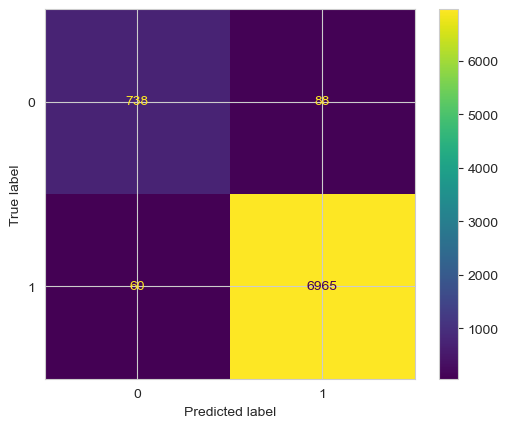

In [110]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [111]:
print(classification_report(y1_train, y1train_predict))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       826
           1       0.99      0.99      0.99      7025

    accuracy                           0.98      7851
   macro avg       0.96      0.94      0.95      7851
weighted avg       0.98      0.98      0.98      7851



In [112]:
confusion_matrix(y1_test, y1test_predict)

array([[ 316,   38],
       [  23, 2989]], dtype=int64)

In [113]:
cm = confusion_matrix(y1_test, y1test_predict)
cm

array([[ 316,   38],
       [  23, 2989]], dtype=int64)

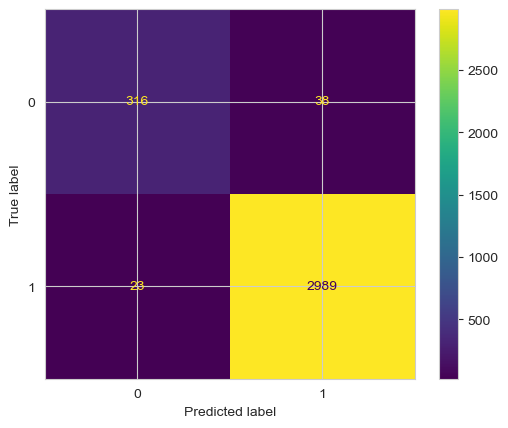

In [114]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [115]:
print(classification_report(y1_test, y1test_predict))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       354
           1       0.99      0.99      0.99      3012

    accuracy                           0.98      3366
   macro avg       0.96      0.94      0.95      3366
weighted avg       0.98      0.98      0.98      3366



In [117]:
for idx2, col_name in enumerate(X1_test.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx2]))

The coefficient for dvcat is 0.6406401640420135
The coefficient for weight is 0.007175080245011356
The coefficient for airbag is 0.8535377824321096
The coefficient for seatbelt is 0.856878902671269
The coefficient for frontal is 1.182136676447145
The coefficient for sex is 0.372492412189811
The coefficient for ageOFocc is -0.03500160338597787
The coefficient for abcat is 0.1851842362839773
The coefficient for occRole is -0.46928689854751626
The coefficient for deploy is -0.6683535461481442
The coefficient for injSeverity is -4.4620811012429


In [118]:
#LDA Model
clf = LinearDiscriminantAnalysis()
model2=clf.fit(X1_train,y1_train)

In [119]:
pred_class_train = model2.predict(X1_train)

pred_class_test = model2.predict(X1_test)

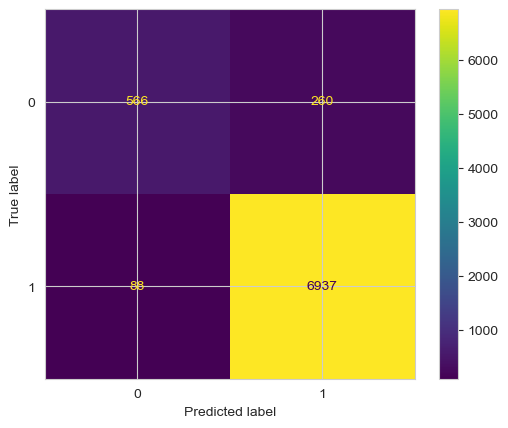

In [120]:
## Confusion matrix on the training data
cm1 = confusion_matrix(y1_train, pred_class_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model2.classes_)
disp.plot()

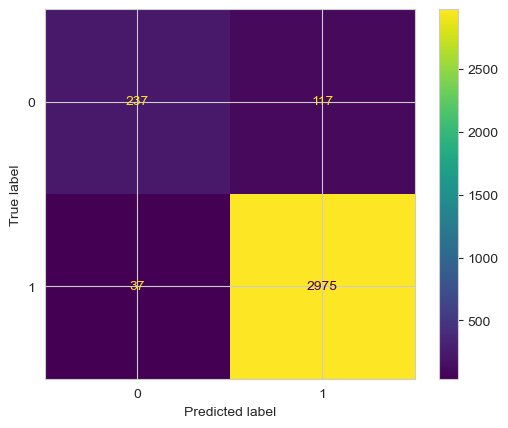

In [121]:
## Confusion matrix on the testing data
cm1 = confusion_matrix(y1_test, pred_class_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model2.classes_)
disp.plot()

In [122]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y1_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y1_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.87      0.69      0.76       826
           1       0.96      0.99      0.98      7025

    accuracy                           0.96      7851
   macro avg       0.91      0.84      0.87      7851
weighted avg       0.95      0.96      0.95      7851
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.67      0.75       354
           1       0.96      0.99      0.97      3012

    accuracy                           0.95      3366
   macro avg       0.91      0.83      0.86      3366
weighted avg       0.95      0.95      0.95      3366
 



In [123]:
# Training Data Probability Prediction
pred_prob_train = model2.predict_proba(X1_train)

# Test Data Probability Prediction
pred_prob_test = model2.predict_proba(X1_test)

AUC for the Training Data: 0.979
AUC for the Test Data: 0.978


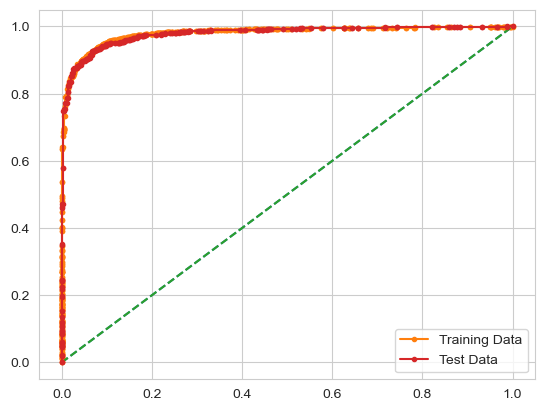

In [124]:
# AUC and ROC for the training data

auc = metrics.roc_auc_score(y1_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

fpr, tpr, thresholds = metrics.roc_curve(y1_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.',label = 'Training Data')


auc = metrics.roc_auc_score(y1_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)


fpr, tpr, thresholds = metrics.roc_curve(y1_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.',label='Test Data')

plt.legend(loc='best')
plt.show()


In [125]:
feature_importance_lr = model.coef_[0]
print("Logistic Regression Feature Importance:", feature_importance_lr)

Logistic Regression Feature Importance: [ 0.64064016  0.00717508  0.85353778  0.8568789   1.18213668  0.37249241
 -0.0350016   0.18518424 -0.4692869  -0.66835355 -4.4620811 ]


In [126]:
coefficients_df = pd.DataFrame({'Feature': X1.columns, 'Coefficient': model.coef_[0]})

print("Logistic Regression Coefficients:")
print(coefficients_df)

Logistic Regression Coefficients:
        Feature  Coefficient
0         dvcat     0.640640
1        weight     0.007175
2        airbag     0.853538
3      seatbelt     0.856879
4       frontal     1.182137
5           sex     0.372492
6      ageOFocc    -0.035002
7         abcat     0.185184
8       occRole    -0.469287
9        deploy    -0.668354
10  injSeverity    -4.462081


In [127]:
coefficients_df2 = pd.DataFrame({'Feature': X1.columns, 'Coefficient': model2.coef_[0]})

print("Logistic Regression Coefficients:")
print(coefficients_df2)

Logistic Regression Coefficients:
        Feature  Coefficient
0         dvcat     0.798153
1        weight    -0.000742
2        airbag     0.473683
3      seatbelt     0.606389
4       frontal     0.818368
5           sex     0.474540
6      ageOFocc    -0.026032
7         abcat     0.120535
8       occRole    -0.287235
9        deploy    -0.073340
10  injSeverity    -1.543356


In [129]:
for idx3, col_name in enumerate(X1_test.columns):
    print("The coefficient for {} is {}".format(col_name, model2.coef_[0][idx3]))

The coefficient for dvcat is 0.7981533817183232
The coefficient for weight is -0.0007416459885542775
The coefficient for airbag is 0.47368298157750294
The coefficient for seatbelt is 0.6063892133429107
The coefficient for frontal is 0.8183679580751099
The coefficient for sex is 0.4745402369664335
The coefficient for ageOFocc is -0.02603188304662198
The coefficient for abcat is 0.1205348233537516
The coefficient for occRole is -0.28723479255923134
The coefficient for deploy is -0.07334048867811763
The coefficient for injSeverity is -1.5433558560613099
